In [1]:
import numpy as np
import cvxpy as cp
import tqdm as tqdm
import matplotlib.pyplot as plt

In [2]:
u_f = 1
L_f = 3

u_phi = 1
L_phi = 1
 

In [3]:
resolution = 20

EXTRA_best_list_neg = np.zeros(10)
EXTRA_best_list_pos = np.zeros(10)
EXTRA_best_list = np.zeros(10)

In [9]:
for lambeda_choice in range(10):
    

    lambda_1 = (lambeda_choice/20)
    lambda_min = 0
    lambda_min = lambda_1
    u_g = u_f 
    
#     alpha = u_g*(1 + lambda_min)/(4*L_f*L_f)
    # lambda_2 = 0.2

#     EXTRA_theta  = cp.Variable()
    theta_selection = np.linspace(1,10,resolution)
    EXTRA_rate = np.ones((resolution, resolution, resolution))
#     IQC_rate = np.ones(resolution) * best_rho


    for i, EXTRA_theta in enumerate(theta_selection[1:]):
        for k, eta_EXTRA in enumerate(np.linspace(0,2*u_g,resolution)[1:]):
            for j, alpha in enumerate(np.linspace(0,eta_EXTRA*((1 + lambda_min)/2)/(L_f**2),resolution)[1:]):
                delta_1 = alpha*(2*u_g - eta_EXTRA )*((1 - lambda_1)/2)/(EXTRA_theta * alpha* alpha * L_f * L_f + ((1 - lambda_1)/2))
#                 delta_1 = alpha*(2*u_g - eta_EXTRA )
                delta_1 = np.max((delta_1, 0))

                delta_2 = ((EXTRA_theta - 1)*(eta_EXTRA*(1 + lambda_min)/2 - alpha* L_f * L_f)* ((1 - lambda_1)/2)/ 
                           (EXTRA_theta * eta_EXTRA * (1+alpha *L_f )* (1+alpha *L_f )))
                delta_2 = np.max((delta_2, 0))
                best_delta = np.minimum(delta_1,delta_2)

                EXTRA_rate[i,j,k] = 1/(1 + best_delta)
#     u_g = u_f 
#     alpha = u_g*(1 + 0)/(4*L_f*L_f)
#     lambda_2 = (lambeda_choice/20)

#     EXTRA_theta  = cp.Variable()
#     resolution = 10000
#     theta_selection = np.linspace(1,10,resolution,endpoint=False)
#     EXTRA_rate = np.zeros(resolution)
#     IQC_rate = np.ones(resolution) * best_rho


#     for i, EXTRA_theta in enumerate(theta_selection):
#         delta_1 = alpha*(u_g )*(1 - lambda_2)/(EXTRA_theta * alpha * L_f * L_f + (1 - lambda_2 ))

#         delta_2 = (EXTRA_theta - 1)*u_g* (1 - lambda_2 ) / (EXTRA_theta * u_g * (1+alpha *L_f )* (1+alpha *L_f ))

#         best_delta = np.minimum(delta_1,delta_2)

#         EXTRA_rate[i] = 1/(1 + best_delta)
    EXTRA_best_list_pos[lambeda_choice] = np.min(EXTRA_rate)

In [5]:
Qu_Na_best_list = np.zeros(10)
for lambeda_choice in range(10):
    

    lambda_1 = (lambeda_choice/20)
    G = np.zeros((3,3))
#     learning_eta = 1/L_f
    learning_eta = (u_f/L_f**2)*((1-lambda_1)/6)**2
    G[0,0] = lambda_1 + L_f*learning_eta
    G[0,1] = (2 + L_f*learning_eta)*L_f
    G[0,2] = ( L_f*learning_eta)*L_f
    G[1,0] = learning_eta
    G[1,1] = lambda_1
    G[2,1] = L_f*learning_eta
    G[2,2] = np.max([np.abs(1 - u_f*learning_eta), np.abs(1 - L_f*learning_eta)])
    rho_G = np.max(np.abs(np.linalg.eig(G)[0]))
    print(rho_G)
    Qu_Na_best_list[lambeda_choice] = rho_G


0.9969144020165415
0.9972151749720736
0.9975005382983144
0.997770489666242
0.9980250268771884
0.9982641478623137
0.9984878506820831
0.9986961335257469
0.9988889947108229
0.9990664326825822


In [6]:
# NIDS_best_list = np.zeros(10)
# for lambeda_choice in range(10):
    

#     lambda_1 = (lambeda_choice/20)
#     learning_eta = 1/L_f
# #     learning_eta = (u_f/L_f**2)*((1-lambda_1)/6)**2
    
#     rho_NIDS = np.max([])
#     print(rho_NIDS)
#     NIDS_best_list[lambeda_choice] = rho_NIDS


NameError: name 'Qu_Na_best_list' is not defined

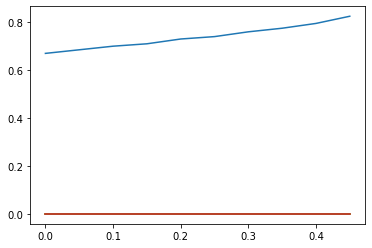

In [4]:
IQC_best_list = np.load("IQC_best_list_1_3.npy")
x_selection = np.linspace(0,0.5,10, endpoint=False)
plt.plot(x_selection, IQC_best_list, label="QC (our result)")
plt.plot(x_selection, EXTRA_best_list, label="Theoretical rate of EXTRA")
plt.plot(x_selection, EXTRA_best_list_neg, label="Theoretical rate of EXTRA neg")
plt.plot(x_selection, EXTRA_best_list_pos, label="Theoretical rate of EXTRA pos")
plt.plot(x_selection, Qu_Na_best_list, label="Theoretical rate of Qu et al.")
plt.ylim(0.5,1.01)
plt.legend()
plt.xlabel("$\lambda$")
plt.ylabel("Convergence Rate")
# plt.show()
# plt.savefig("Comparison_all.pdf")
print(EXTRA_best_list)
